# Dense Neural Network for Text Classification

## Preliminaries

### Imports

In [1]:
import os
import pickle 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

import tensorflow as tf

%matplotlib inline

import sys
sys.path.append("../..")

from E4525_ML import text


C:\Users\ankur\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
seed=456
np.random.seed(seed)

In [3]:
import os

### Data

In [6]:
reviews_filename=os.getcwd()+"\\Reviews.csv"

In [7]:
data=pd.read_csv(reviews_filename)

In [8]:
data.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [9]:
#data_dir=r"../../data/amazon-reviews"
data_dir=os.getcwd()
#model_dir=r"../../data/models/tf/AmazonReviews_Binary_Embedding"
#dense_model_dir=r"../../data/models/tf/AmazonReviews_Binary_DNN
model_dir = os.getcwd()
dense_model_dir= os.getcwd()

### Split into Train, Validation and Test Sets

In [10]:
documents_all=data["Text"].as_matrix()
labels_all=data["Score"].as_matrix()
print(documents_all.shape)

(568454,)


C:\Users\ankur\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\ankur\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [11]:
docs,docs_test,labels,labels_test=train_test_split(documents_all,labels_all,test_size=0.1)
print(docs.shape,docs_test.shape)

(511608,) (56846,)


In [12]:
docs_train,docs_val,labels_train,labels_val=train_test_split(docs,labels,test_size=0.05)
print(docs_train.shape,docs_val.shape)

(486027,) (25581,)


## Text Embedding Pipeline

In [13]:
countVectorizer=TfidfVectorizer(input="content",decode_error="ignore",
                                       max_features=50000,
                                       tokenizer=text.stem_tokenizer,
                                       stop_words=text.stop_words())
dencoder=text.DocumentEncoder(countVectorizer)  #sklearn encoder
#object of class DocumentEncoder, now to call its functions


In [17]:
#pickle_filename=data_dir+"\\amazon_reviews.p"
if False:
    texts_train=dencoder.fit_transform(docs_train)
    texts_val=dencoder.transform(docs_val)
    texts_test=dencoder.transform(docs_test)
    
    #file=open(pickle_filename,"wb")
    #pickle.dump((countVectorizer,texts_train,labels_train,texts_val,labels_val,texts_test,labels_test),file)
    #file.close()
else:
    file=open(pickle_filename,"rb")
    countVectorizer,texts_train,labels_train,texts_val,labels_val,texts_test,labels_test=pickle.load(file)
    file.close()
print(texts_train.shape,texts_val.shape,texts_test.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Project\\Amazon\\amazon_reviews.p'

In [18]:
texts_train=dencoder.fit_transform(docs_train)
texts_val=dencoder.transform(docs_val)
texts_test=dencoder.transform(docs_test)

In [22]:
texts_train.shape

(486027,)

In [25]:
texts_train[0:2]
#these are indexed of words present in those rows.

array([array([44803, 13593, 47940, 36788, 34153,  9351, 24531, 17572, 13193,
        9643, 14300, 28088, 31308, 11587, 28797,  8446, 40548, 34153,
       24183, 49253,  6316, 42502, 21165, 46663, 11970, 18782, 11587,
       18468, 43340,  6436, 31441,  6530, 45450, 35687, 13593, 47940,
       23530, 35695, 32607, 40813, 43570, 48687, 48538, 35695, 32607,
       40679, 10450,  8228, 38300, 35258, 14233, 37844,  6436, 17760,
       14310, 46274], dtype=int32),
       array([22024, 36377, 18908, 13820, 14258, 44161, 32108, 42002, 30270,
       35817, 33140, 13534, 33140, 13593, 30620,  6555, 20114, 12671,
       39953, 48452, 21521, 35833, 17403,  7418, 22819, 30816,  9601,
       36203, 28009, 38267], dtype=int32)], dtype=object)

In [28]:
texts_train[0][0:125] #means dont take all words, but take first 125 , if not present index is -2

array([44803, 13593, 47940, 36788, 34153,  9351, 24531, 17572, 13193,
        9643, 14300, 28088, 31308, 11587, 28797,  8446, 40548, 34153,
       24183, 49253,  6316, 42502, 21165, 46663, 11970, 18782, 11587,
       18468, 43340,  6436, 31441,  6530, 45450, 35687, 13593, 47940,
       23530, 35695, 32607, 40813, 43570, 48687, 48538, 35695, 32607,
       40679, 10450,  8228, 38300, 35258, 14233, 37844,  6436, 17760,
       14310, 46274], dtype=int32)

In [23]:
ltexts=[len(text) for text in texts_train]

In [38]:
#ltexts

In [39]:
ltexts.index(152)

43

(array([189251., 161099.,  66112.,  30420.,  15775.,   8397.,   5174.,
          3155.,   1873.,   1325.]),
 array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225., 250.]),
 <a list of 10 Patch objects>)

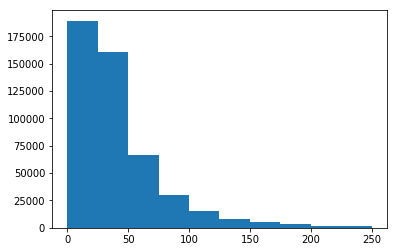

In [12]:
plt.hist(ltexts,range=[0,250])

In [29]:
def pad_texts(texts,W):
    fragments=[]
    fragment_labels=[]
    for idx,text in enumerate(texts):
            fragment=text[0:W]
            fragment=np.pad(fragment,(W-len(fragment),0),mode="constant",constant_values=-2)
            fragments.append(fragment)
    return np.array(fragments)

In [30]:
W=125

In [31]:
X_train=pad_texts(texts_train,W)
Y_train=labels_train>3
print(X_train.shape,Y_train.shape)

(486027, 125) (486027,)


In [40]:
(X_train[43])

array([45657, 29386, 17925, 35307, 23605, 38014, 44291, 20508, 16194,
       43547, 24831, 43875, 17925, 31184,  7468, 23597, 32826, 13883,
       47088, 23605, 29386, 47068, 18746, 44803, 44291, 16022, 24831,
       10305, 36494, 33140, 17925, 35260, 44161, 10005, 33140, 48555,
       25051, 27501, 27374, 33140, 41996, 17925, 35307, 22819, 40168,
       43158, 27490, 20022, 18920, 13840, 13713, 41783, 39781, 37335,
       44989, 17925, 36587, 41152, 45177, 45407, 17572, 36122,  7136,
       10498, 10498, 45657, 29386, 37657, 17403,  5062, 15189, 15600,
       41756, 43840,  7880, 22201, 37770, 17177, 43840, 24891, 10498,
       10498, 32218, 13365, 43026, 18897, 18028, 17925, 17925, 42702,
        6522, 12200, 19725, 25153, 10165, 25009, 32215, 12200, 48736,
       10060, 12200, 28441, 24831, 12200,  8347,  8763, 47664,  6318,
       12200, 24975, 11588, 17925, 22819, 35680, 18028, 49262, 23347,
       27556, 43840, 42039, 37693, 47665, 10498, 10498, 17925])

In [41]:
texts_train[43]

array([45657, 29386, 17925, 35307, 23605, 38014, 44291, 20508, 16194,
       43547, 24831, 43875, 17925, 31184,  7468, 23597, 32826, 13883,
       47088, 23605, 29386, 47068, 18746, 44803, 44291, 16022, 24831,
       10305, 36494, 33140, 17925, 35260, 44161, 10005, 33140, 48555,
       25051, 27501, 27374, 33140, 41996, 17925, 35307, 22819, 40168,
       43158, 27490, 20022, 18920, 13840, 13713, 41783, 39781, 37335,
       44989, 17925, 36587, 41152, 45177, 45407, 17572, 36122,  7136,
       10498, 10498, 45657, 29386, 37657, 17403,  5062, 15189, 15600,
       41756, 43840,  7880, 22201, 37770, 17177, 43840, 24891, 10498,
       10498, 32218, 13365, 43026, 18897, 18028, 17925, 17925, 42702,
        6522, 12200, 19725, 25153, 10165, 25009, 32215, 12200, 48736,
       10060, 12200, 28441, 24831, 12200,  8347,  8763, 47664,  6318,
       12200, 24975, 11588, 17925, 22819, 35680, 18028, 49262, 23347,
       27556, 43840, 42039, 37693, 47665, 10498, 10498, 17925,  7327,
       22819,  7714,

In [33]:
X_val=pad_texts(texts_val,W)
Y_val=labels_val>3
print(X_val.shape,Y_val.shape)

(25581, 125) (25581,)


In [34]:

X_test=pad_texts(texts_test,W)
Y_test=labels_test>3
print(X_test.shape,Y_test.shape)

#all docs 125 words

(56846, 125) (56846,)


In [18]:
X_train[0]

array([   -2,    -2,    -2,    -2,    -2,    -2,    -2,    -2,    -2,
          -2,    -2,    -2,    -2,    -2,    -2,    -2,    -2,    -2,
          -2,    -2,    -2,    -2,    -2,    -2,    -2,    -2,    -2,
          -2,    -2,    -2,    -2,    -2,    -2,    -2,    -2,    -2,
          -2,    -2,    -2,    -2,    -2,    -2,    -2,    -2,    -2,
          -2,    -2,    -2,    -2,    -2,    -2,    -2,    -2,    -2,
          -2,    -2,    -2,    -2,    -2,    -2,    -2,    -2,    -2,
          -2,    -2,    -2,    -2,    -2,    -2, 44803, 13593, 47940,
       36788, 34153,  9351, 24531, 17572, 13193,  9643, 14300, 28088,
       31308, 11587, 28797,  8446, 40548, 34153, 24183, 49253,  6316,
       42502, 21165, 46663, 11970, 18782, 11587, 18468, 43340,  6436,
       31441,  6530, 45450, 35687, 13593, 47940, 23530, 35695, 32607,
       40813, 43570, 48687, 48538, 35695, 32607, 40679, 10450,  8228,
       38300, 35258, 14233, 37844,  6436, 17760, 14310, 46274])

In [19]:
X_train.max(),X_train.min()

(49999, -2)

In [20]:
Y_test.mean()

0.7829926468001267

## Text Embedding Model

This model is equivalent to logistic regression on the Counts features.

In [42]:
import tensorflow as tf
from E4525_ML.TFClassifier import TFClassifier

In [ ]:
'''
Vocabulary is total unique words, 50002
X (input layer) is of size 486027 *125
Basically total documents vs first 125 indices
'''

In [22]:
num_classes = 2
V=len(countVectorizer.vocabulary_)+2 # one for unknown words, one for padding
print(num_classes,V)

2 50002


In [23]:
#Define the neural network
class EmbeddedNet:
    def __init__(self,V,classes):
        self.V=V
        self.classes=classes
    def __call__(self,x,in_training):
        print(x.shape)
        # matrix  V * K 
        embedding=tf.Variable(tf.random_uniform([self.V, self.classes],-1,1),
                      name="embedding")
        # array of shape (V,classess) with uniform number between -1 and 1. 
        print(embedding.shape)
        bias=tf.Variable(tf.random_uniform([self.classes],-1,1),name="bias")
        print(bias.shape)
        # for bias, vector of size classes , between -1 and 1. 
        word_vectors=tf.nn.embedding_lookup(embedding,x+2) # because lowest index is -1 for unknown  words
                                                           #  and -2 for padding 
        # in the parameter is embedding and x+2 is id, so looking up for values at these ids in embedding.     
        print(word_vectors.shape)
        #dropout = tf.layers.dropout(
        #              inputs=word_vectors, rate=0.0, training=(in_training>0))
        logits = tf.reduce_sum(word_vectors,axis=1) +bias
        print(logits.shape)
        return logits

In [24]:
net=EmbeddedNet(V,num_classes)

In [25]:
num_steps = 10 # with a bach size of 500, we will iterate over data set 100 times
learning_rate=0.01
learning_rate_end=0.01
learning_steps=5
batch_size=5000

In [26]:
N=X_train.shape[0]
D=None # X.shape[1]
K=num_classes
print(N,D,K)

486027 None 2


In [27]:
print(X_train.shape,Y_train.shape,X_val.shape,Y_val.shape)

(486027, 125) (486027,) (25581, 125) (25581,)


In [28]:
# Build the Estimator
model = TFClassifier(D,K,net,
                     model_dir=model_dir,
                     max_iter=num_steps,
                     learning_rate=learning_rate,
                     learning_rate_end=learning_rate_end,
                     learning_steps=learning_steps,
                     summary_steps=1,
                     batch_size=batch_size,
                     dtype=tf.int32,
                     use_adam_optimizer=True,
                     X_val=X_val,
                     Y_val=Y_val
                    )

(?, ?)
(50002, 2)
(2,)
(?, ?, 2)
(?, 2)


In [29]:
model.fit(X_train,Y_train)

	0: TRAIN Loss 101.5831, Acc 0.2271 || VAL Loss 101.5946, Acc 0.2290
	1: TRAIN Loss 5.2321, Acc 0.7177 || VAL Loss 5.3177, Acc 0.7189
	2: TRAIN Loss 0.8326, Acc 0.8225 || VAL Loss 0.8578, Acc 0.8197
	3: TRAIN Loss 0.5265, Acc 0.8610 || VAL Loss 0.5739, Acc 0.8529
	4: TRAIN Loss 0.3866, Acc 0.8826 || VAL Loss 0.4439, Acc 0.8713
	5: TRAIN Loss 0.3085, Acc 0.8968 || VAL Loss 0.3725, Acc 0.8819
	6: TRAIN Loss 0.2645, Acc 0.9061 || VAL Loss 0.3314, Acc 0.8882
	7: TRAIN Loss 0.2396, Acc 0.9121 || VAL Loss 0.3090, Acc 0.8921
	8: TRAIN Loss 0.2255, Acc 0.9160 || VAL Loss 0.2971, Acc 0.8942
	9: TRAIN Loss 0.2169, Acc 0.9180 || VAL Loss 0.2909, Acc 0.8950
	10: TRAIN Loss 0.2110, Acc 0.9200 || VAL Loss 0.2877, Acc 0.8946


In [30]:
Y_pred=model.predict(X_val)
np.mean(Y_pred==Y_val)

INFO:tensorflow:Restoring parameters from ../../data/models/tf/AmazonReviews_Binary_Embedding\optimization.ckpt-10


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8946483718384739

## Dense Neural Network

### Build Dense Neural Network

In [31]:
#Define the neural network
class DenseNet:
    def __init__(self,V,classes,D,E,hidden1,hidden2):
        self.V=V
        self.D=D
        self.E=E
        self.classes=classes
        self.hidden1=hidden1
        self.hidden2=hidden2
    def __call__(self,x,in_training):
        print(x.shape)
        embedding=tf.Variable(tf.random_uniform([self.V, self.E],-1,1),
                      name="embedding")
        print(embedding.shape)
        #Each word linear combination of these vectors so values between -1 to 1. 
        
        #bias=tf.Variable(tf.random_uniform([self.classes],-1,1),name="bias")
        #print(bias.shape)
        word_vectors=tf.nn.embedding_lookup(embedding,x+2) # because lowest index is -1 for unknown  words
                                                           #  and -2 for padding 
        # whatever the index the X has for that document, get linear combination for those words(index)    
        dropout0= tf.layers.dropout(
                      inputs=word_vectors,rate=0.5,training=(in_training>0))    #50 % drop out
        print(dropout0.shape)
        flat_input=tf.reshape(dropout0,[-1,self.E*D])
        print(flat_input.shape)
        layer1 = tf.layers.dense(flat_input, self.hidden1,activation=tf.nn.relu)
        dropout1 = tf.layers.dropout(
                      inputs=layer1, rate=0.0, training=(in_training>0))
        print(dropout1.shape)
        layer2 = tf.layers.dense(dropout1, self.hidden2,activation=tf.nn.relu)
        # Add dropout operation; 0.6 probability that element will be kept
        dropout2 = tf.layers.dropout(
                      inputs=layer2, rate=0.5,training=(in_training>0))
        print(dropout2.shape)
        logits = tf.layers.dense(dropout2, self.classes)
        print(logits.shape)
        return logits

In [32]:
N=X_train.shape[0]
D=X_train.shape[1]
E=10
K=num_classes
print(N,D,E,K)

486027 125 10 2


In [33]:
hidden1=128
hidden2=64

In [34]:
dense_net=DenseNet(V,num_classes,D,E,hidden1,hidden2)

In [35]:
num_steps = 100 # with a bach size of 500, we will iterate over data set 100 times
learning_rate=0.001
learning_rate_end=0.001
learning_steps=2
batch_size=5000

In [36]:
# Build the Estimator
model = TFClassifier(D,K,dense_net,
                     model_dir=dense_model_dir,
                     max_iter=num_steps,
                     learning_rate=learning_rate,
                     learning_rate_end=learning_rate_end,
                     learning_steps=learning_steps,
                     summary_steps=5,
                     batch_size=batch_size,
                     dtype=tf.int32,
                     use_adam_optimizer=True,
                     X_val=X_val,
                     Y_val=Y_val
                    )

(?, 125)
(50002, 10)
(?, 125, 10)
(?, 1250)
(?, 128)
(?, 64)
(?, 2)


In [37]:
model.fit(X_train,Y_train)

	0: TRAIN Loss 0.8381, Acc 0.3232 || VAL Loss 0.8402, Acc 0.3193
	5: TRAIN Loss 0.3313, Acc 0.8555 || VAL Loss 0.3407, Acc 0.8524
	10: TRAIN Loss 0.2689, Acc 0.8885 || VAL Loss 0.2847, Acc 0.8797
	15: TRAIN Loss 0.2457, Acc 0.8988 || VAL Loss 0.2677, Acc 0.8879
	20: TRAIN Loss 0.2308, Acc 0.9058 || VAL Loss 0.2595, Acc 0.8933
	25: TRAIN Loss 0.2146, Acc 0.9135 || VAL Loss 0.2514, Acc 0.8980
	30: TRAIN Loss 0.2030, Acc 0.9195 || VAL Loss 0.2468, Acc 0.9011
	35: TRAIN Loss 0.1922, Acc 0.9240 || VAL Loss 0.2438, Acc 0.9036
	40: TRAIN Loss 0.1834, Acc 0.9278 || VAL Loss 0.2395, Acc 0.9061
	45: TRAIN Loss 0.1743, Acc 0.9320 || VAL Loss 0.2371, Acc 0.9062
	50: TRAIN Loss 0.1684, Acc 0.9347 || VAL Loss 0.2363, Acc 0.9074
	55: TRAIN Loss 0.1616, Acc 0.9380 || VAL Loss 0.2335, Acc 0.9083
	60: TRAIN Loss 0.1551, Acc 0.9404 || VAL Loss 0.2337, Acc 0.9080
	65: TRAIN Loss 0.1507, Acc 0.9428 || VAL Loss 0.2326, Acc 0.9093
	70: TRAIN Loss 0.1469, Acc 0.9443 || VAL Loss 0.2315, Acc 0.9093
	75: TRAIN L

In [38]:
Y_pred=model.predict(X_val)
np.mean(Y_pred==Y_val)

INFO:tensorflow:Restoring parameters from ../../data/models/tf/AmazonReviews_Binary_DNN\optimization.ckpt-100


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9130604745709706

### layer size optimization

In [39]:
results=[]
for E in [10,15]:
  for hidden1 in [128,256]:
    for hidden2 in [64,128,256]:
        # Build the Estimator
        dense_net=DenseNet(V,num_classes,D,E,hidden1,hidden2)
        # Build the Estimator
        model = TFClassifier(D,K,dense_net,
                     model_dir=dense_model_dir,
                     max_iter=num_steps,
                     learning_rate=learning_rate,
                     learning_rate_end=learning_rate_end,
                     learning_steps=learning_steps,
                             
                     summary_steps=10,
                     batch_size=batch_size,
                     dtype=tf.int32,
                     use_adam_optimizer=True,
                     X_val=X_val,
                     Y_val=Y_val
                    )
        model.fit(X_train,Y_train)
        Y_pred=model.predict(X_train)
        acc_train=np.mean(Y_pred==Y_train)
        Y_pred=model.predict(X_val)
        acc_val=np.mean(Y_pred==Y_val)
        print(E,hidden1,hidden2,acc_train,acc_val)
        results.append((E,hidden1,hidden2,acc_train,acc_val))
        

(?, 125)
(50002, 10)
(?, 125, 10)
(?, 1250)
(?, 128)
(?, 64)
(?, 2)
	0: TRAIN Loss 0.7601, Acc 0.4172 || VAL Loss 0.7583, Acc 0.4221
	10: TRAIN Loss 0.2667, Acc 0.8876 || VAL Loss 0.2839, Acc 0.8796
	20: TRAIN Loss 0.2251, Acc 0.9094 || VAL Loss 0.2561, Acc 0.8944
	30: TRAIN Loss 0.1991, Acc 0.9212 || VAL Loss 0.2471, Acc 0.9011
	40: TRAIN Loss 0.1779, Acc 0.9305 || VAL Loss 0.2389, Acc 0.9049
	50: TRAIN Loss 0.1631, Acc 0.9370 || VAL Loss 0.2328, Acc 0.9070
	60: TRAIN Loss 0.1539, Acc 0.9414 || VAL Loss 0.2316, Acc 0.9087
	70: TRAIN Loss 0.1432, Acc 0.9458 || VAL Loss 0.2306, Acc 0.9108
	80: TRAIN Loss 0.1356, Acc 0.9490 || VAL Loss 0.2301, Acc 0.9114
	90: TRAIN Loss 0.1294, Acc 0.9516 || VAL Loss 0.2319, Acc 0.9120
	100: TRAIN Loss 0.1240, Acc 0.9538 || VAL Loss 0.2311, Acc 0.9126
INFO:tensorflow:Restoring parameters from ../../data/models/tf/AmazonReviews_Binary_DNN\optimization.ckpt-100
INFO:tensorflow:Restoring parameters from ../../data/models/tf/AmazonReviews_Binary_DNN\optimiza

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


10 128 64 0.9537741730397694 0.9126304679254134
(?, 125)
(50002, 10)
(?, 125, 10)
(?, 1250)
(?, 128)
(?, 128)
(?, 2)
	0: TRAIN Loss 0.6391, Acc 0.6620 || VAL Loss 0.6420, Acc 0.6607
	10: TRAIN Loss 0.2647, Acc 0.8899 || VAL Loss 0.2840, Acc 0.8819
	20: TRAIN Loss 0.2239, Acc 0.9105 || VAL Loss 0.2574, Acc 0.8946
	30: TRAIN Loss 0.1992, Acc 0.9222 || VAL Loss 0.2445, Acc 0.9013
	40: TRAIN Loss 0.1817, Acc 0.9294 || VAL Loss 0.2394, Acc 0.9052
	50: TRAIN Loss 0.1674, Acc 0.9360 || VAL Loss 0.2351, Acc 0.9071
	60: TRAIN Loss 0.1567, Acc 0.9404 || VAL Loss 0.2321, Acc 0.9085
	70: TRAIN Loss 0.1487, Acc 0.9443 || VAL Loss 0.2295, Acc 0.9102
	80: TRAIN Loss 0.1407, Acc 0.9474 || VAL Loss 0.2316, Acc 0.9109
	90: TRAIN Loss 0.1349, Acc 0.9502 || VAL Loss 0.2294, Acc 0.9118
	100: TRAIN Loss 0.1279, Acc 0.9527 || VAL Loss 0.2315, Acc 0.9123
INFO:tensorflow:Restoring parameters from ../../data/models/tf/AmazonReviews_Binary_DNN\optimization.ckpt-100
INFO:tensorflow:Restoring parameters from ../..

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


10 128 128 0.9526775261456668 0.9123177358195536
(?, 125)
(50002, 10)
(?, 125, 10)
(?, 1250)
(?, 128)
(?, 256)
(?, 2)
	0: TRAIN Loss 0.8189, Acc 0.2665 || VAL Loss 0.8188, Acc 0.2689
	10: TRAIN Loss 0.2629, Acc 0.8909 || VAL Loss 0.2815, Acc 0.8826
	20: TRAIN Loss 0.2206, Acc 0.9122 || VAL Loss 0.2549, Acc 0.8960
	30: TRAIN Loss 0.1966, Acc 0.9235 || VAL Loss 0.2446, Acc 0.9016
	40: TRAIN Loss 0.1790, Acc 0.9310 || VAL Loss 0.2402, Acc 0.9038
	50: TRAIN Loss 0.1649, Acc 0.9372 || VAL Loss 0.2365, Acc 0.9068
	60: TRAIN Loss 0.1547, Acc 0.9413 || VAL Loss 0.2345, Acc 0.9079
	70: TRAIN Loss 0.1467, Acc 0.9452 || VAL Loss 0.2335, Acc 0.9097
	80: TRAIN Loss 0.1389, Acc 0.9479 || VAL Loss 0.2326, Acc 0.9114
	90: TRAIN Loss 0.1320, Acc 0.9512 || VAL Loss 0.2317, Acc 0.9120
	100: TRAIN Loss 0.1269, Acc 0.9526 || VAL Loss 0.2331, Acc 0.9117
INFO:tensorflow:Restoring parameters from ../../data/models/tf/AmazonReviews_Binary_DNN\optimization.ckpt-100
INFO:tensorflow:Restoring parameters from ../.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


10 128 256 0.952634318669539 0.911692271607834
(?, 125)
(50002, 10)
(?, 125, 10)
(?, 1250)
(?, 256)
(?, 64)
(?, 2)
	0: TRAIN Loss 0.7158, Acc 0.5128 || VAL Loss 0.7143, Acc 0.5130
	10: TRAIN Loss 0.2621, Acc 0.8908 || VAL Loss 0.2822, Acc 0.8807
	20: TRAIN Loss 0.2169, Acc 0.9132 || VAL Loss 0.2550, Acc 0.8955
	30: TRAIN Loss 0.1845, Acc 0.9281 || VAL Loss 0.2409, Acc 0.9037
	40: TRAIN Loss 0.1634, Acc 0.9374 || VAL Loss 0.2357, Acc 0.9063
	50: TRAIN Loss 0.1505, Acc 0.9432 || VAL Loss 0.2335, Acc 0.9079
	60: TRAIN Loss 0.1376, Acc 0.9489 || VAL Loss 0.2310, Acc 0.9098
	70: TRAIN Loss 0.1281, Acc 0.9525 || VAL Loss 0.2318, Acc 0.9120
	80: TRAIN Loss 0.1210, Acc 0.9562 || VAL Loss 0.2305, Acc 0.9123
	90: TRAIN Loss 0.1148, Acc 0.9590 || VAL Loss 0.2296, Acc 0.9131
	100: TRAIN Loss 0.1085, Acc 0.9617 || VAL Loss 0.2308, Acc 0.9140
INFO:tensorflow:Restoring parameters from ../../data/models/tf/AmazonReviews_Binary_DNN\optimization.ckpt-100
INFO:tensorflow:Restoring parameters from ../../d

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


10 256 64 0.961658508683674 0.9139595793753176
(?, 125)
(50002, 10)
(?, 125, 10)
(?, 1250)
(?, 256)
(?, 128)
(?, 2)
	0: TRAIN Loss 0.6395, Acc 0.6806 || VAL Loss 0.6385, Acc 0.6815
	10: TRAIN Loss 0.2587, Acc 0.8939 || VAL Loss 0.2791, Acc 0.8840
	20: TRAIN Loss 0.2097, Acc 0.9166 || VAL Loss 0.2519, Acc 0.8976
	30: TRAIN Loss 0.1820, Acc 0.9305 || VAL Loss 0.2395, Acc 0.9040
	40: TRAIN Loss 0.1621, Acc 0.9395 || VAL Loss 0.2343, Acc 0.9080
	50: TRAIN Loss 0.1485, Acc 0.9447 || VAL Loss 0.2341, Acc 0.9086
	60: TRAIN Loss 0.1362, Acc 0.9502 || VAL Loss 0.2324, Acc 0.9106
	70: TRAIN Loss 0.1264, Acc 0.9534 || VAL Loss 0.2326, Acc 0.9116
	80: TRAIN Loss 0.1198, Acc 0.9569 || VAL Loss 0.2303, Acc 0.9116
	90: TRAIN Loss 0.1117, Acc 0.9602 || VAL Loss 0.2351, Acc 0.9134
	100: TRAIN Loss 0.1092, Acc 0.9619 || VAL Loss 0.2337, Acc 0.9135
INFO:tensorflow:Restoring parameters from ../../data/models/tf/AmazonReviews_Binary_DNN\optimization.ckpt-100
INFO:tensorflow:Restoring parameters from ../../

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


10 256 128 0.961934213531347 0.9134513897032954
(?, 125)
(50002, 10)
(?, 125, 10)
(?, 1250)
(?, 256)
(?, 256)
(?, 2)
	0: TRAIN Loss 0.5909, Acc 0.7299 || VAL Loss 0.5941, Acc 0.7236
	10: TRAIN Loss 0.2662, Acc 0.8891 || VAL Loss 0.2851, Acc 0.8800
	20: TRAIN Loss 0.2206, Acc 0.9117 || VAL Loss 0.2573, Acc 0.8937
	30: TRAIN Loss 0.1938, Acc 0.9238 || VAL Loss 0.2465, Acc 0.9003
	40: TRAIN Loss 0.1739, Acc 0.9325 || VAL Loss 0.2418, Acc 0.9038
	50: TRAIN Loss 0.1587, Acc 0.9399 || VAL Loss 0.2371, Acc 0.9077
	60: TRAIN Loss 0.1456, Acc 0.9448 || VAL Loss 0.2356, Acc 0.9092
	70: TRAIN Loss 0.1352, Acc 0.9492 || VAL Loss 0.2363, Acc 0.9113
	80: TRAIN Loss 0.1288, Acc 0.9522 || VAL Loss 0.2362, Acc 0.9126
	90: TRAIN Loss 0.1217, Acc 0.9554 || VAL Loss 0.2352, Acc 0.9140
	100: TRAIN Loss 0.1146, Acc 0.9582 || VAL Loss 0.2362, Acc 0.9140
INFO:tensorflow:Restoring parameters from ../../data/models/tf/AmazonReviews_Binary_DNN\optimization.ckpt-100
INFO:tensorflow:Restoring parameters from ../..

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


10 256 256 0.9581772206070857 0.9139986708885501
(?, 125)
(50002, 15)
(?, 125, 15)
(?, 1875)
(?, 128)
(?, 64)
(?, 2)
	0: TRAIN Loss 0.8924, Acc 0.3085 || VAL Loss 0.8888, Acc 0.3132
	10: TRAIN Loss 0.2562, Acc 0.8936 || VAL Loss 0.2778, Acc 0.8842
	20: TRAIN Loss 0.2156, Acc 0.9137 || VAL Loss 0.2532, Acc 0.8969
	30: TRAIN Loss 0.1864, Acc 0.9270 || VAL Loss 0.2422, Acc 0.9024
	40: TRAIN Loss 0.1644, Acc 0.9364 || VAL Loss 0.2366, Acc 0.9068
	50: TRAIN Loss 0.1472, Acc 0.9438 || VAL Loss 0.2349, Acc 0.9095
	60: TRAIN Loss 0.1356, Acc 0.9493 || VAL Loss 0.2339, Acc 0.9105
	70: TRAIN Loss 0.1254, Acc 0.9538 || VAL Loss 0.2335, Acc 0.9120
	80: TRAIN Loss 0.1186, Acc 0.9568 || VAL Loss 0.2311, Acc 0.9139
	90: TRAIN Loss 0.1115, Acc 0.9599 || VAL Loss 0.2339, Acc 0.9144
	100: TRAIN Loss 0.1030, Acc 0.9630 || VAL Loss 0.2351, Acc 0.9156
INFO:tensorflow:Restoring parameters from ../../data/models/tf/AmazonReviews_Binary_DNN\optimization.ckpt-100
INFO:tensorflow:Restoring parameters from ../..

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


15 128 64 0.963008227937954 0.9155623314178492
(?, 125)
(50002, 15)
(?, 125, 15)
(?, 1875)
(?, 128)
(?, 128)
(?, 2)
	0: TRAIN Loss 0.5584, Acc 0.7686 || VAL Loss 0.5616, Acc 0.7667
	10: TRAIN Loss 0.2559, Acc 0.8960 || VAL Loss 0.2762, Acc 0.8860
	20: TRAIN Loss 0.2167, Acc 0.9155 || VAL Loss 0.2535, Acc 0.8979
	30: TRAIN Loss 0.1898, Acc 0.9261 || VAL Loss 0.2434, Acc 0.9022
	40: TRAIN Loss 0.1709, Acc 0.9353 || VAL Loss 0.2402, Acc 0.9056
	50: TRAIN Loss 0.1546, Acc 0.9417 || VAL Loss 0.2389, Acc 0.9081
	60: TRAIN Loss 0.1425, Acc 0.9467 || VAL Loss 0.2375, Acc 0.9107
	70: TRAIN Loss 0.1339, Acc 0.9502 || VAL Loss 0.2376, Acc 0.9125
	80: TRAIN Loss 0.1266, Acc 0.9538 || VAL Loss 0.2350, Acc 0.9138
	90: TRAIN Loss 0.1177, Acc 0.9571 || VAL Loss 0.2375, Acc 0.9144
	100: TRAIN Loss 0.1124, Acc 0.9593 || VAL Loss 0.2353, Acc 0.9157
INFO:tensorflow:Restoring parameters from ../../data/models/tf/AmazonReviews_Binary_DNN\optimization.ckpt-100
INFO:tensorflow:Restoring parameters from ../../

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


15 128 128 0.9592944424898205 0.9156796059575466
(?, 125)
(50002, 15)
(?, 125, 15)
(?, 1875)
(?, 128)
(?, 256)
(?, 2)
	0: TRAIN Loss 0.5374, Acc 0.7783 || VAL Loss 0.5398, Acc 0.7748
	10: TRAIN Loss 0.2443, Acc 0.9009 || VAL Loss 0.2733, Acc 0.8875
	20: TRAIN Loss 0.2032, Acc 0.9212 || VAL Loss 0.2522, Acc 0.8980
	30: TRAIN Loss 0.1815, Acc 0.9300 || VAL Loss 0.2457, Acc 0.9015
	40: TRAIN Loss 0.1655, Acc 0.9372 || VAL Loss 0.2414, Acc 0.9056
	50: TRAIN Loss 0.1527, Acc 0.9426 || VAL Loss 0.2399, Acc 0.9077
	60: TRAIN Loss 0.1443, Acc 0.9458 || VAL Loss 0.2410, Acc 0.9077
	70: TRAIN Loss 0.1365, Acc 0.9488 || VAL Loss 0.2399, Acc 0.9086
	80: TRAIN Loss 0.1290, Acc 0.9528 || VAL Loss 0.2363, Acc 0.9101
	90: TRAIN Loss 0.1226, Acc 0.9556 || VAL Loss 0.2371, Acc 0.9111
	100: TRAIN Loss 0.1153, Acc 0.9576 || VAL Loss 0.2385, Acc 0.9129
INFO:tensorflow:Restoring parameters from ../../data/models/tf/AmazonReviews_Binary_DNN\optimization.ckpt-100
INFO:tensorflow:Restoring parameters from ../.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


15 128 256 0.9575723159412954 0.9128650170048083
(?, 125)
(50002, 15)
(?, 125, 15)
(?, 1875)
(?, 256)
(?, 64)
(?, 2)
	0: TRAIN Loss 0.6024, Acc 0.7239 || VAL Loss 0.6045, Acc 0.7212
	10: TRAIN Loss 0.2475, Acc 0.8984 || VAL Loss 0.2728, Acc 0.8860
	20: TRAIN Loss 0.1973, Acc 0.9238 || VAL Loss 0.2466, Acc 0.9007
	30: TRAIN Loss 0.1638, Acc 0.9370 || VAL Loss 0.2385, Acc 0.9066
	40: TRAIN Loss 0.1409, Acc 0.9479 || VAL Loss 0.2342, Acc 0.9103
	50: TRAIN Loss 0.1256, Acc 0.9539 || VAL Loss 0.2359, Acc 0.9122
	60: TRAIN Loss 0.1128, Acc 0.9596 || VAL Loss 0.2361, Acc 0.9135
	70: TRAIN Loss 0.1030, Acc 0.9640 || VAL Loss 0.2366, Acc 0.9155
	80: TRAIN Loss 0.0960, Acc 0.9663 || VAL Loss 0.2409, Acc 0.9156
	90: TRAIN Loss 0.0903, Acc 0.9689 || VAL Loss 0.2408, Acc 0.9173
	100: TRAIN Loss 0.0834, Acc 0.9716 || VAL Loss 0.2382, Acc 0.9179
INFO:tensorflow:Restoring parameters from ../../data/models/tf/AmazonReviews_Binary_DNN\optimization.ckpt-100
INFO:tensorflow:Restoring parameters from ../..

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


15 256 64 0.9716373781703486 0.9179078222117978
(?, 125)
(50002, 15)
(?, 125, 15)
(?, 1875)
(?, 256)
(?, 128)
(?, 2)
	0: TRAIN Loss 0.6461, Acc 0.6426 || VAL Loss 0.6462, Acc 0.6425
	10: TRAIN Loss 0.2558, Acc 0.8953 || VAL Loss 0.2769, Acc 0.8841
	20: TRAIN Loss 0.2128, Acc 0.9158 || VAL Loss 0.2529, Acc 0.8972
	30: TRAIN Loss 0.1845, Acc 0.9275 || VAL Loss 0.2424, Acc 0.9027
	40: TRAIN Loss 0.1581, Acc 0.9389 || VAL Loss 0.2363, Acc 0.9082
	50: TRAIN Loss 0.1399, Acc 0.9472 || VAL Loss 0.2317, Acc 0.9121
	60: TRAIN Loss 0.1249, Acc 0.9540 || VAL Loss 0.2309, Acc 0.9145
	70: TRAIN Loss 0.1131, Acc 0.9593 || VAL Loss 0.2293, Acc 0.9164
	80: TRAIN Loss 0.1039, Acc 0.9622 || VAL Loss 0.2336, Acc 0.9164
	90: TRAIN Loss 0.0951, Acc 0.9661 || VAL Loss 0.2364, Acc 0.9174
	100: TRAIN Loss 0.0897, Acc 0.9684 || VAL Loss 0.2384, Acc 0.9194
INFO:tensorflow:Restoring parameters from ../../data/models/tf/AmazonReviews_Binary_DNN\optimization.ckpt-100
INFO:tensorflow:Restoring parameters from ../..

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


15 256 128 0.968437967438023 0.9193542082013995
(?, 125)
(50002, 15)
(?, 125, 15)
(?, 1875)
(?, 256)
(?, 256)
(?, 2)
	0: TRAIN Loss 0.5471, Acc 0.7783 || VAL Loss 0.5503, Acc 0.7743
	10: TRAIN Loss 0.2418, Acc 0.9027 || VAL Loss 0.2713, Acc 0.8881
	20: TRAIN Loss 0.1944, Acc 0.9248 || VAL Loss 0.2499, Acc 0.8979
	30: TRAIN Loss 0.1652, Acc 0.9368 || VAL Loss 0.2409, Acc 0.9049
	40: TRAIN Loss 0.1459, Acc 0.9446 || VAL Loss 0.2417, Acc 0.9075
	50: TRAIN Loss 0.1314, Acc 0.9519 || VAL Loss 0.2389, Acc 0.9111
	60: TRAIN Loss 0.1201, Acc 0.9572 || VAL Loss 0.2374, Acc 0.9123
	70: TRAIN Loss 0.1111, Acc 0.9604 || VAL Loss 0.2410, Acc 0.9126
	80: TRAIN Loss 0.1035, Acc 0.9628 || VAL Loss 0.2459, Acc 0.9138
	90: TRAIN Loss 0.0954, Acc 0.9664 || VAL Loss 0.2457, Acc 0.9149
	100: TRAIN Loss 0.0912, Acc 0.9682 || VAL Loss 0.2497, Acc 0.9147
INFO:tensorflow:Restoring parameters from ../../data/models/tf/AmazonReviews_Binary_DNN\optimization.ckpt-100
INFO:tensorflow:Restoring parameters from ../..

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


15 256 256 0.9681890100755719 0.9146632266135022


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [40]:
import pandas as pd

In [41]:
data=pd.DataFrame(results,columns=["E","layer1","layer2","train","valuation"])
data.head()

,E,layer1,layer2,train,valuation
0,10,128,64,0.953774,0.912630
1,10,128,128,0.952678,0.912318
2,10,128,256,0.952634,0.911692
3,10,256,64,0.961659,0.913960
4,10,256,128,0.961934,0.913451


In [42]:
data.to_csv(model_dir+"/DNN_Binary_Text_AmazonReviews.csv")
val_error=data[["E","layer1","layer2","valuation"]]

In [43]:
data["valuation"].max()

0.9193542082013995

In [44]:
best=data.iloc[data["valuation"].argmax()]
best_E=int(best["E"])
best_hidden1=int(best["layer1"])
best_hidden2=int(best["layer2"])
best

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


E             15.000000
layer1       256.000000
layer2       128.000000
train          0.968438
valuation      0.919354
Name: 10, dtype: float64

The best model achieves 91.7% accuracy using and embedding of size 15, and two dense layers of 256 and 128 units.

### Test of best model

In [45]:
dense_net=DenseNet(V,num_classes,D,best_E,best_hidden1,best_hidden2)

In [46]:
num_steps = 100 # with a bach size of 500, we will iterate over data set 100 times
learning_rate=0.001
learning_rate_end=0.001
learning_steps=2
batch_size=5000

In [47]:
X=np.concatenate([X_train,X_val])
Y=np.concatenate([Y_train,Y_val])
print(X.shape,Y.shape,X_test.shape,Y_test.shape)

(511608, 125) (511608,) (56846, 125) (56846,)


In [48]:
model = TFClassifier(D,K,dense_net,
                     model_dir=dense_model_dir,
                     max_iter=num_steps,
                     learning_rate=learning_rate,
                     learning_rate_end=learning_rate_end,
                     learning_steps=learning_steps,
                             
                     summary_steps=10,
                     batch_size=batch_size,
                     dtype=tf.int32,
                     use_adam_optimizer=True,
                     X_val=X_test,
                     Y_val=Y_test
                    )

(?, 125)
(50002, 15)
(?, 125, 15)
(?, 1875)
(?, 256)
(?, 128)
(?, 2)


This model is a **very large**

In [49]:
model.fit(X,Y)

	0: TRAIN Loss 0.5645, Acc 0.7772 || VAL Loss 0.5612, Acc 0.7796
	10: TRAIN Loss 0.2522, Acc 0.8947 || VAL Loss 0.2676, Acc 0.8871
	20: TRAIN Loss 0.2043, Acc 0.9191 || VAL Loss 0.2412, Acc 0.9018
	30: TRAIN Loss 0.1698, Acc 0.9345 || VAL Loss 0.2306, Acc 0.9090
	40: TRAIN Loss 0.1451, Acc 0.9445 || VAL Loss 0.2263, Acc 0.9130
	50: TRAIN Loss 0.1269, Acc 0.9531 || VAL Loss 0.2264, Acc 0.9157
	60: TRAIN Loss 0.1157, Acc 0.9580 || VAL Loss 0.2263, Acc 0.9167
	70: TRAIN Loss 0.1047, Acc 0.9632 || VAL Loss 0.2246, Acc 0.9188
	80: TRAIN Loss 0.0951, Acc 0.9662 || VAL Loss 0.2284, Acc 0.9194
	90: TRAIN Loss 0.0881, Acc 0.9691 || VAL Loss 0.2327, Acc 0.9204
	100: TRAIN Loss 0.0860, Acc 0.9709 || VAL Loss 0.2301, Acc 0.9204


In [50]:
Y_pred=model.predict(X_test)
np.mean(Y_pred==Y_test)

INFO:tensorflow:Restoring parameters from ../../data/models/tf/AmazonReviews_Binary_DNN\optimization.ckpt-100


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9203637898884706

So we achieve 92% accuracy on the test set